In [0]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Bug Report classification"

'ASF JIRA 1.csv'  'ASF JIRA 4.csv'  'ASF JIRA 7.csv'
'ASF JIRA 2.csv'  'ASF JIRA 5.csv'  'ASF JIRA 8.csv'
'ASF JIRA 3.csv'  'ASF JIRA 6.csv'   Dataset


In [0]:
data1=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 1.csv")
data2=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 2.csv")
data3=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 3.csv")
data4=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 4.csv")
data5=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 5.csv")
data6=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 6.csv")
data7=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 7.csv")
data8=pd.read_csv("/content/drive/My Drive/Bug Report classification/ASF JIRA 8.csv")
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [0]:
data.head()

,Affects Version/s,Affects Version/s.1,Affects Version/s.10,Affects Version/s.11,Affects Version/s.12,Affects Version/s.13,Affects Version/s.14,Affects Version/s.15,Affects Version/s.16,Affects Version/s.17,Affects Version/s.18,Affects Version/s.19,Affects Version/s.2,Affects Version/s.20,Affects Version/s.21,Affects Version/s.22,Affects Version/s.23,Affects Version/s.3,Affects Version/s.4,Affects Version/s.5,Affects Version/s.6,Affects Version/s.7,Affects Version/s.8,Affects Version/s.9,Assignee,Attachment,Attachment.1,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.2,Attachment.20,Attachment.21,...,Outward issue link (Reference).9,Outward issue link (Regression),Outward issue link (Regression).1,Outward issue link (Regression).2,Outward issue link (Required),Outward issue link (Required).1,Outward issue link (Required).2,Outward issue link (Supercedes),Outward issue link (Supercedes).1,Outward issue link (Supercedes).2,Outward issue link (dependent),Outward issue link (dependent).1,Outward issue link (dependent).2,Outward issue link (dependent).3,Outward issue link (dependent).4,Outward issue link (dependent).5,Outward issue link (dependent).6,Outward issue link (dependent).7,Parent id,Priority,Project description,Project key,Project lead,Project name,Project type,Project url,Remaining Estimate,Reporter,Resolution,Resolved,Security Level,Status,Summary,Time Spent,Updated,Votes,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocker,"Java Lucene is a high-performance, full-featur...",LUCENE,ehatcher,Lucene - Core,software,http://lucene.apache.org/core/,NaN,jpountz,Fixed,04/Jul/19 12:05,NaN,Closed,TestRamUsageEstimator.testMap failures,NaN,26/Jul/19 08:54,0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tomoko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocker,"Java Lucene is a high-performance, full-featur...",LUCENE,ehatcher,Lucene - Core,software,http://lucene.apache.org/core/,NaN,tomoko,Fixed,11/Jul/19 14:56,NaN,Closed,Provide backward compatibility for loading ana...,NaN,26/Jul/19 08:54,0,NaN,NaN,NaN,NaN
2,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,uschindler,21/May/19 14:10;uschindler;LUCENE-8807.patch;h...,21/May/19 13:43;uschindler;LUCENE-8807.patch;h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocker,"Java Lucene is a high-performance, full-featur...",LUCENE,ehatcher,Lucene - Core,software,http://lucene.apache.org/core/,NaN,uschindler,Fixed,21/May/19 15:51,NaN,Closed,Change all download URLs in build files to HTTPS,NaN,05/Jun/19 21:30,1,NaN,NaN,NaN,NaN
3,6.4,6.4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17/Feb/17 16:03;mikemccand;LUCENE-7698.patch;h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blocker,"Java Lucene is a high-performance, full-featur...",LUCENE,ehatcher,Lucene - Core,software,http://lucene.apache.org/core/,NaN,emaijala,Fixed,22/Feb/17 10:55,NaN,Resolved,CommonGramsQueryFilter in the query analyzer c...,NaN,03/Apr/19 08:21,0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,simonw,17/Oct/18 08:20;simonw;LUCENE-6572.patch;https...,09/Jun/16 17:27;jpountz;LUCENE-6572.patch;http...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN

In [0]:
cols_of_interest=["Issue key","Issue id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last Viewed","Resolved","Issue Type"]
dataset=data[cols_of_interest]
print(dataset.shape)
dataset.head()

(7347, 13)


,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,LUCENE-8898,13242651,TestRamUsageEstimator.testMap failures,Closed,Here is an example failure:\r\n\r\n{noformat}\...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,Bug
1,LUCENE-8907,13244057,Provide backward compatibility for loading ana...,Closed,The changes in LUCENE-8778 have breaking chang...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,Task
2,LUCENE-8807,13234613,Change all download URLs in build files to HTTPS,Closed,At least for Lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,Task
3,LUCENE-7698,13043903,CommonGramsQueryFilter in the query analyzer c...,Resolved,(Please pardon me if the project or component ...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,Bug
4,LUCENE-6572,12838134,Highlighter depends on analyzers-common,Closed,"This is a huge WTF, just for ""LimitTokenOffset...",Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,Bug


In [0]:
# Removing contents of tags and all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'<.+?>', value=r' ')

# Removing links from all for further text processing
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', value=r' ')

# Replace email addresses
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^.+@[^\.].*\.[a-z]{2,}$', value=r'')

# Replace URLs with 'web-address'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', value=r'')

# Replace 10 digit phone numbers
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', value=r'')

# Replace numbers with 'numbr'
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'\d+(\.\d+)?', value=r'')

# Remove punctuation
dataset['Description'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')
dataset['Summary'].replace(regex=True,inplace=True, to_replace= r'[^\w\d\s]', value=r'')

#converting to lower case
dataset['Description'] = dataset['Description'].str.lower()
dataset['Summary'] = dataset['Summary'].str.lower()

# Removing non-english content
# dataset.drop(dataset[dataset.language!="english"].index,inplace=True)

# Removing rows with empty columns 
dataset.dropna(subset=['Description','Summary'],inplace=True)
dataset.reset_index(inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 14 columns):
index          7191 non-null int64
Issue key      7191 non-null object
Issue id       7191 non-null int64
Summary        7191 non-null object
Status         7191 non-null object
Description    7191 non-null object
Priority       7191 non-null object
Resolution     7191 non-null object
Assignee       4780 non-null object
Created        7191 non-null object
Updated        7191 non-null object
Last Viewed    7191 non-null object
Resolved       7191 non-null object
Issue Type     7191 non-null object
dtypes: int64(2), object(12)
memory usage: 786.6+ KB


In [0]:
dataset['Issue Type']

0               Bug
1              Task
2              Task
3               Bug
4               Bug
           ...     
7186    Improvement
7187    Improvement
7188    Improvement
7189            Bug
7190    Improvement
Name: Issue Type, Length: 7191, dtype: object

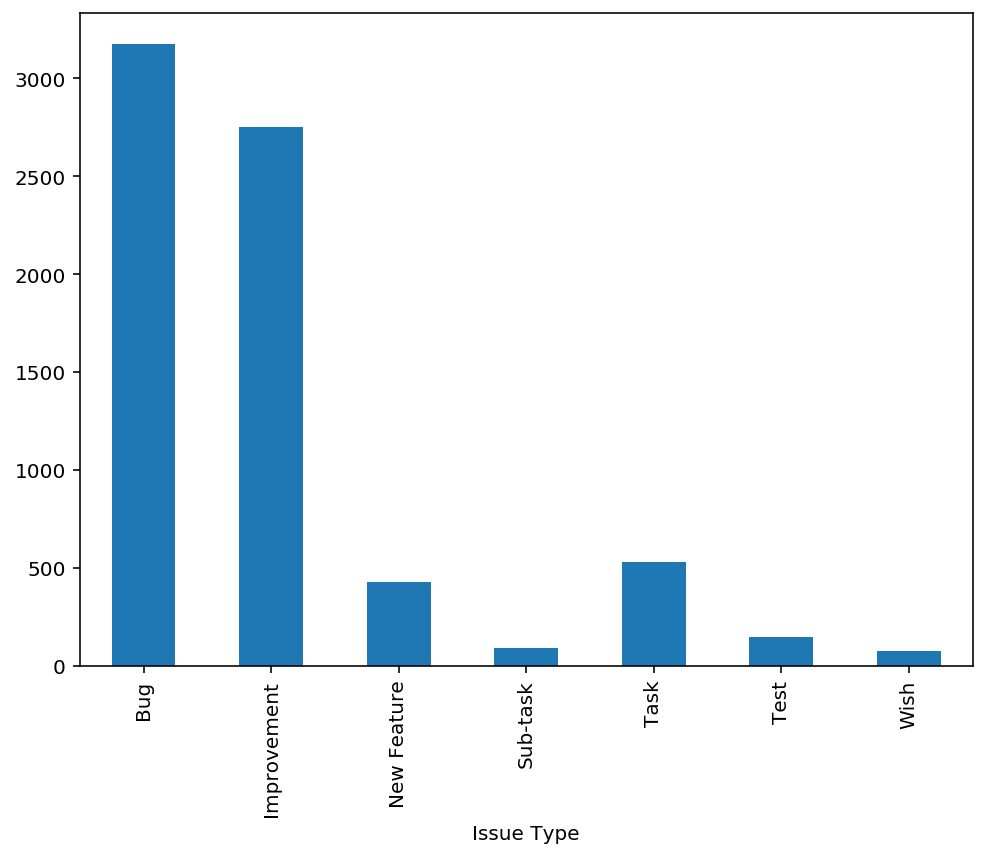

In [0]:
fig = plt.figure(figsize=(8,6))
dataset.groupby('Issue Type').Status.count().plot.bar(ylim=0)
plt.show()

In [0]:
final_c=['Bug','Improvement','New Feature','Sub-task','Task','Test','Wish']

In [0]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset["Issue Type"] = label.fit_transform(dataset["Issue Type"])
dataset.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,0
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,4
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,4
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,0
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,0


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 14 columns):
index          7191 non-null int64
Issue key      7191 non-null object
Issue id       7191 non-null int64
Summary        7191 non-null object
Status         7191 non-null object
Description    7191 non-null object
Priority       7191 non-null object
Resolution     7191 non-null object
Assignee       4780 non-null object
Created        7191 non-null object
Updated        7191 non-null object
Last Viewed    7191 non-null object
Resolved       7191 non-null object
Issue Type     7191 non-null int64
dtypes: int64(3), object(11)
memory usage: 786.6+ KB


In [0]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tfidf.fit(dataset.Summary)
transformed_summary = vectorizer.transform(dataset.Summary)
#transformed_title = vectorizer.transform(dataset.Description)

In [0]:
dataset["Created"][26]

'24/May/17 14:42'

In [0]:
feature_names = tfidf.get_feature_names()

In [0]:
#Returns dictionary with term names and total tfidf scores for all terms in corpus
def get_tfidf_term_scores(feature_names):
    term_corpus_dict = {} 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_summary.T[term_ind].toarray())
        
    return term_corpus_dict

In [0]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [0]:
#Returns sort words from highest score to lowest score
def get_sorted_tfidf_scores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [0]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [0]:
def plot_tfidf_scores(scores,termNames, n_words = 20):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (15, 15))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title(" Top tfidf score of top 20 words in Summary ".format(n_words));
    plt.xlabel("TFIDF Score")

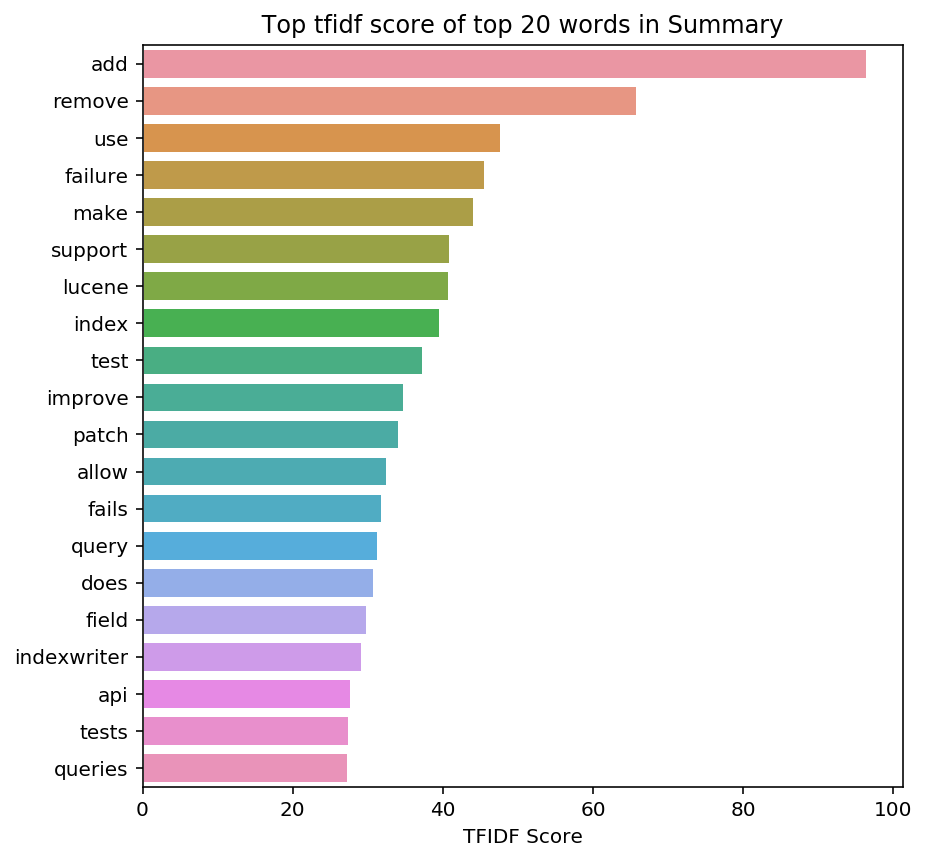

In [0]:
plot_tfidf_scores(scores, termNames, n_words = 20)

In [0]:
diff_corpus=list()
for i in range(0,7,1):
  diff_corpus.append(list())
for i in range(0,dataset.shape[0],1):
  diff_corpus[dataset["Issue Type"][i]].append(dataset.Summary[i])

In [0]:
most_freq_w_in_class=list()

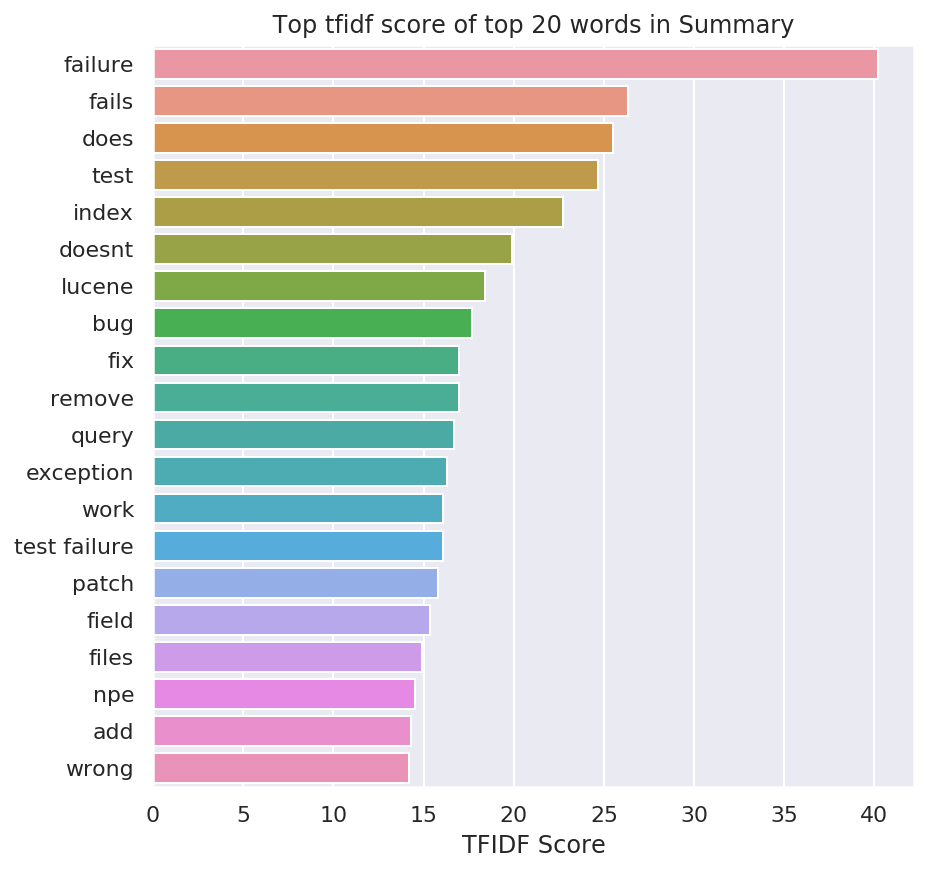

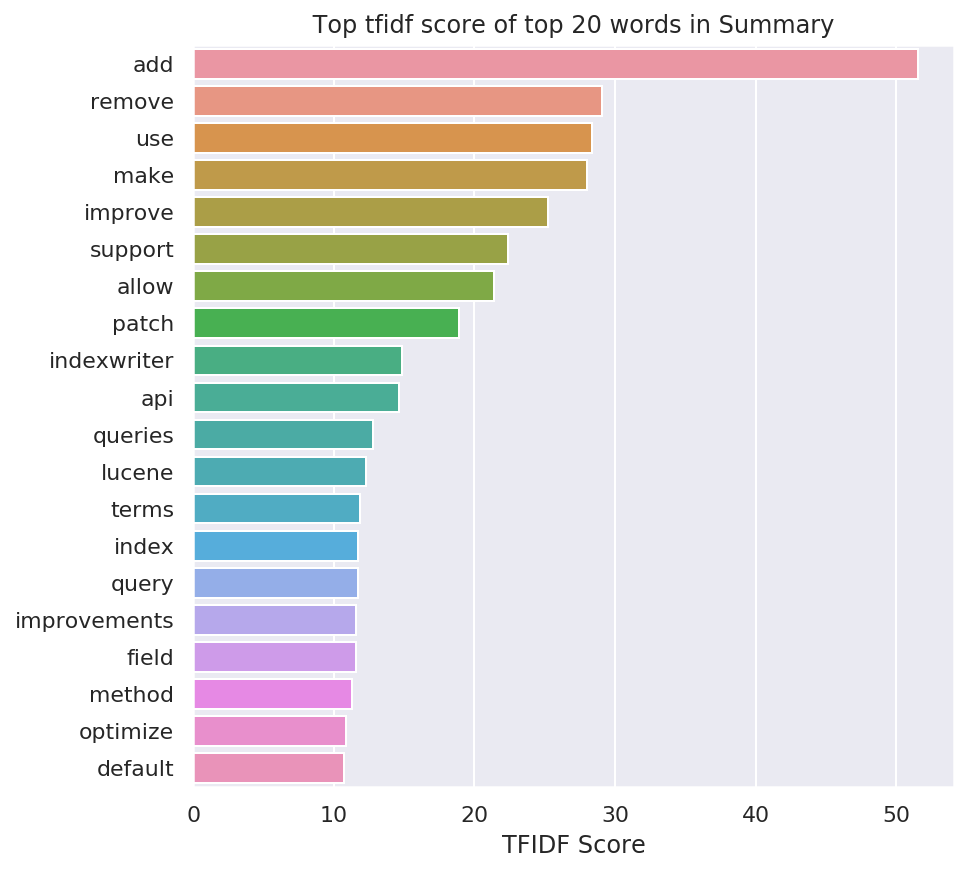

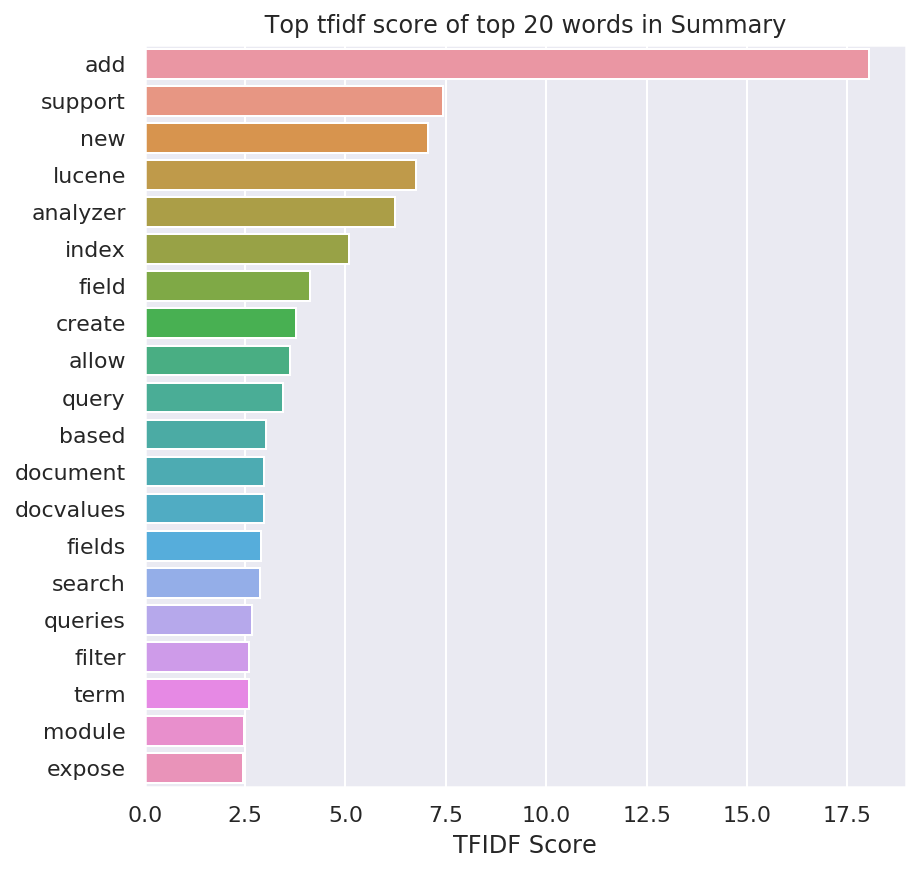

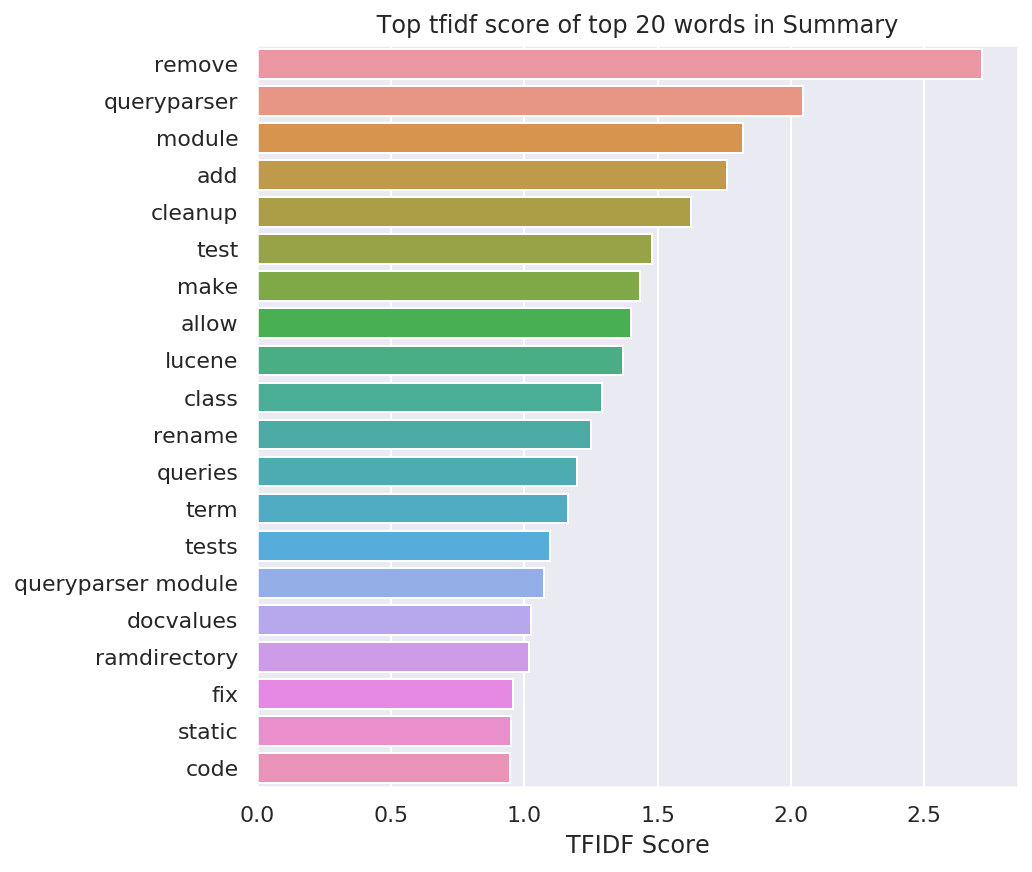

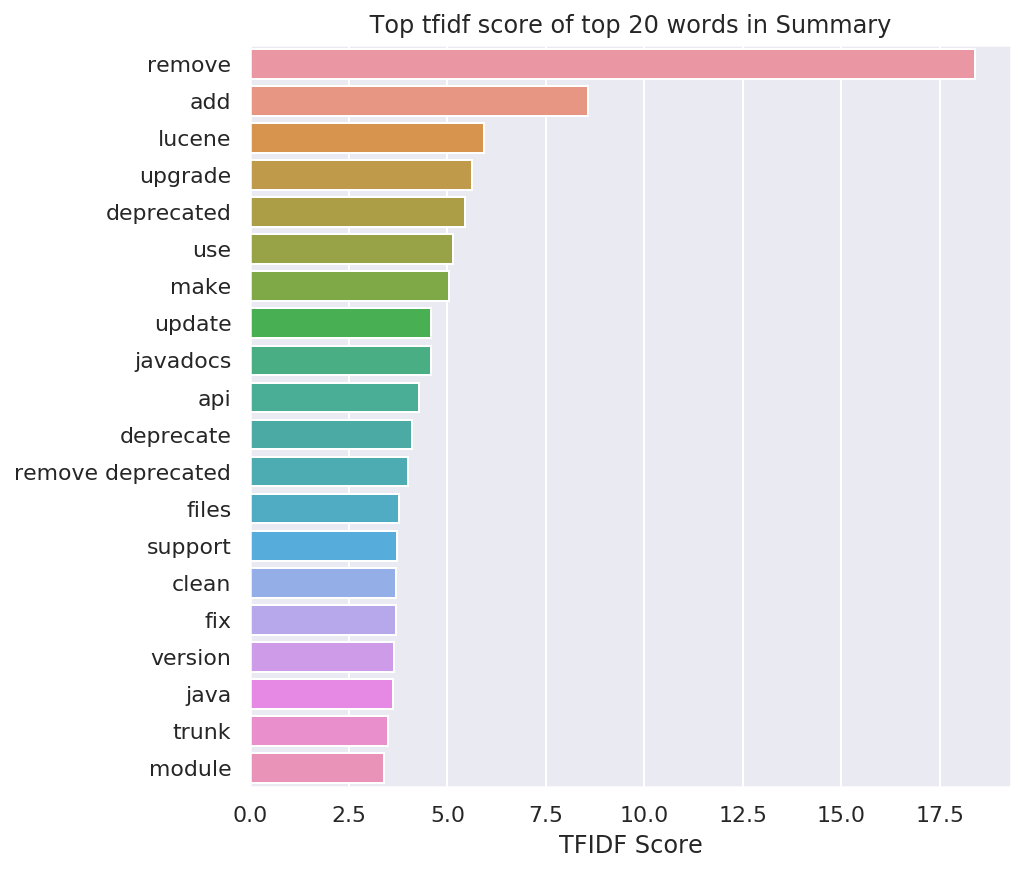

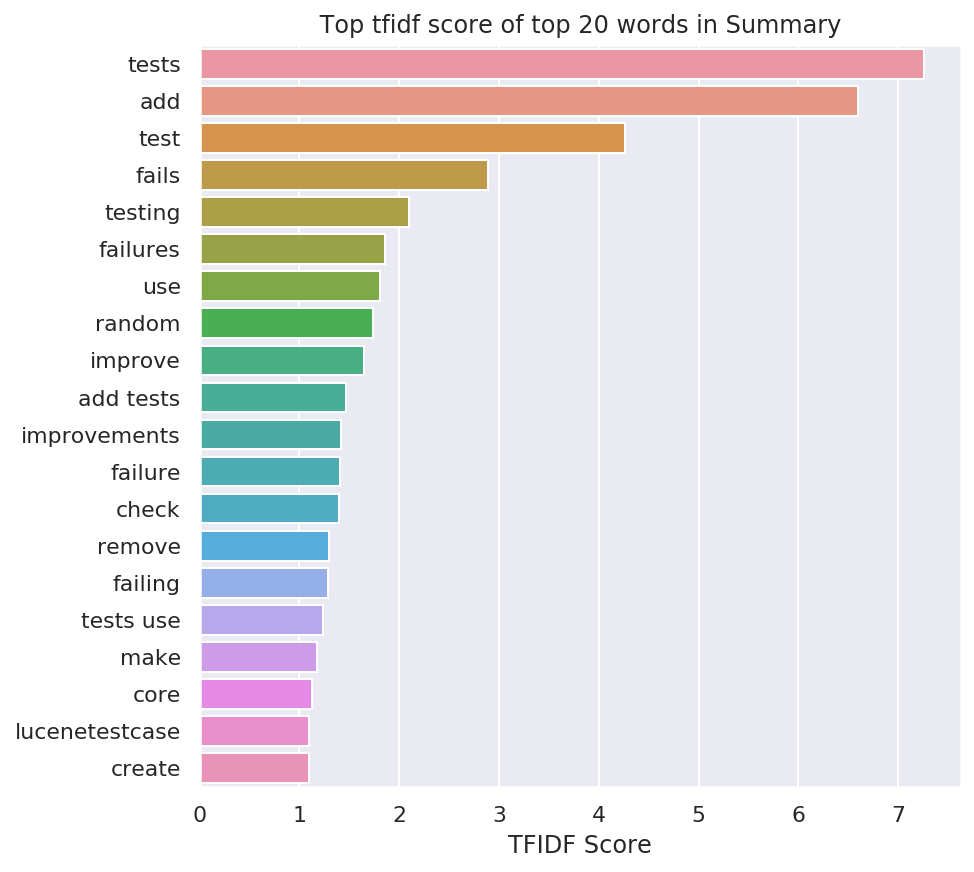

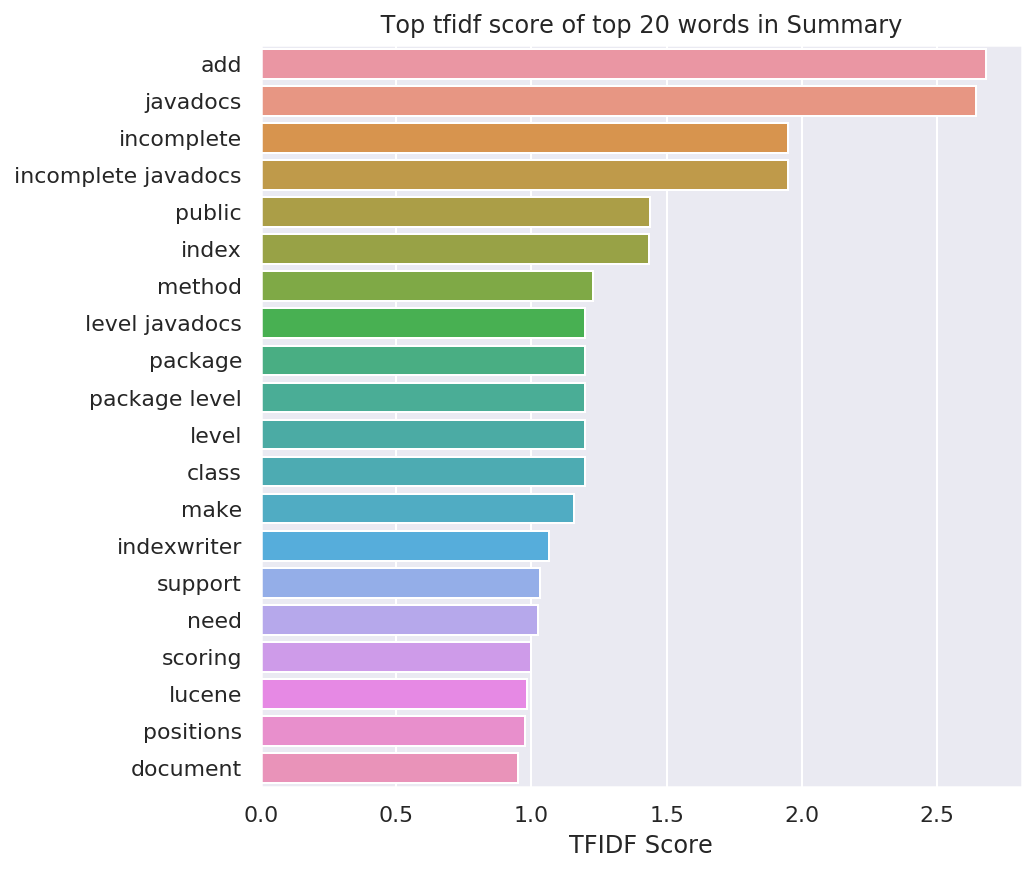

In [0]:
for i in range(0,7,1):
  vectorizer = tfidf.fit(diff_corpus[i])
  transformed_summary = vectorizer.transform(diff_corpus[i])
  feature_names = tfidf.get_feature_names()
  term_corpus_dict = get_tfidf_term_scores(feature_names)
  termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)
  most_freq_w_in_class.append(list(termNames[0:10]))
  plot_tfidf_scores(scores, termNames, n_words = 20)

In [0]:
#list(termNames[0:10])

In [0]:
most_freq_w_in_class

[['failure',
  'fails',
  'does',
  'test',
  'index',
  'doesnt',
  'lucene',
  'bug',
  'fix',
  'remove'],
 ['add',
  'remove',
  'use',
  'make',
  'improve',
  'support',
  'allow',
  'patch',
  'indexwriter',
  'api'],
 ['add',
  'support',
  'new',
  'lucene',
  'analyzer',
  'index',
  'field',
  'create',
  'allow',
  'query'],
 ['remove',
  'queryparser',
  'module',
  'add',
  'cleanup',
  'test',
  'make',
  'allow',
  'lucene',
  'class'],
 ['remove',
  'add',
  'lucene',
  'upgrade',
  'deprecated',
  'use',
  'make',
  'update',
  'javadocs',
  'api'],
 ['tests',
  'add',
  'test',
  'fails',
  'testing',
  'failures',
  'use',
  'random',
  'improve',
  'add tests'],
 ['add',
  'javadocs',
  'incomplete',
  'incomplete javadocs',
  'public',
  'index',
  'method',
  'level javadocs',
  'package',
  'package level']]

In [0]:
type(dataset.Summary)

pandas.core.series.Series

In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Bug','Improvement','New Feature','Sub-task','Task','Test','Wish']),
                 cells=dict(values=most_freq_w_in_class))])
fig.show()
#fig.suptitle('test title', fontsize=20)

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
l_of_words=list()
for i in range(0,7,1):
  l_of_words.append(list())
for i in range(0,dataset.shape[0],1):
  for w in dataset.Summary[i].split():
    if w not in stop:
      l_of_words[dataset["Issue Type"][i]].append(w)

In [0]:
for i in range(0,7,1):
  print("class "+str(i))
  print(l_of_words[i])

class 0
['testramusageestimatortestmap', 'failures', 'commongramsqueryfilter', 'query', 'analyzer', 'chain', 'breaks', 'phrase', 'queries', 'highlighter', 'depends', 'analyzerscommon', 'tessellator', 'throw', 'error', 'points', 'processed', 'multisortersort', 'incorrectly', 'sort', 'integerlongmin_value', 'natural', 'sort', 'reversed', 'tessellator', 'isintersectingpolygon', 'method', 'skip', 'polygon', 'edges', 'tessellator', 'fails', 'filtering', 'coplanar', 'points', 'creating', 'linked', 'list', 'another', 'case', 'polygon', 'tessellator', 'going', 'infinite', 'loop', 'tessellator', 'polygons', 'fail', 'using', 'morton', 'optimisation', 'dv', 'update', 'broken', 'updates', 'new', 'field', 'latlonshape', 'within', 'queries', 'fail', 'multiple', 'search', 'polygons', 'share', 'dateline', 'testgeodpointtestgeodrelations', 'reproducing', 'failures', 'asserting', 'trips', 'iw', 'tries', 'free', 'ram', 'writing', 'dv', 'updates', 'fix', 'npe', 'topfieldcollectors', 'created', 'tracktotal

In [0]:
word_list=list()
for i in range(0,7,1):
  word_list.append(list())
from collections import Counter 
for i in range(0,7,1):
  Counte = Counter(l_of_words[i]) 
  most_occur = Counte.most_common(10) 
  for ele in most_occur:
    word_list[i].append(ele[0])
  print(most_occur) 


[('failure', 154), ('fails', 133), ('index', 125), ('doesnt', 107), ('test', 104), ('lucene', 92), ('query', 87), ('field', 85), ('fix', 82), ('exception', 82)]
[('add', 318), ('use', 173), ('make', 159), ('remove', 136), ('allow', 121), ('improve', 117), ('support', 115), ('patch', 90), ('api', 70), ('queries', 61)]
[('add', 119), ('support', 34), ('lucene', 33), ('new', 28), ('index', 22), ('analyzer', 21), ('field', 18), ('allow', 14), ('query', 14), ('based', 13)]
[('remove', 10), ('move', 8), ('queryparser', 7), ('add', 7), ('test', 6), ('module', 6), ('allow', 5), ('term', 5), ('lucene', 5), ('cleanup', 5)]
[('remove', 97), ('add', 38), ('move', 27), ('lucene', 27), ('use', 25), ('deprecated', 23), ('make', 21), ('javadocs', 19), ('api', 18), ('files', 17)]
[('tests', 41), ('add', 29), ('test', 18), ('fails', 8), ('testing', 7), ('use', 6), ('failures', 5), ('check', 5), ('improve', 5), ('random', 5)]
[('add', 11), ('javadocs', 9), ('class', 5), ('index', 5), ('incomplete', 5), (

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Bug','Improvement','New Feature','Sub-task','Task','Test','Wish']),
                 cells=dict(values=word_list))
                     ])
fig.show()
print("Top 10 Most Frequent Words In Each Category")

Top 10 Most Frequent Words In Each Category


In [0]:
def difference_in_date(create,resolve):
     vari=int(resolve[7:9])-int(create[7:9])
     vari=vari*8760
   
    
     dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
     if(dict[resolve[3:6]]>=dict[create[3:6]]):
      vari+=(int(dict[resolve[3:6]])-int(dict[create[3:6]]))*720
     else:
      vari-=(int(dict[create[3:6]])-int(dict[resolve[3:6]]))*720
 
    
     if(int(create[0:2])<=int(resolve[0:2])):
      vari+=(int(resolve[0:2])-int(create[0:2]))*24
     else:
      vari-=(int(create[0:2])-int(resolve[0:2]))*24
     
    
     if(int(create[10:12])<=int(resolve[10:12])):
      vari+=int(resolve[10:12])-int(create[10:12])
     else:
      vari-=int(create[10:12])-int(resolve[10:12])
     
    
     if(int(create[13:15])<=int(resolve[13:15])):
      vari+=(int(resolve[13:15])-int(create[13:15]))/60
     else:
      vari-=(int(create[13:15])-int(resolve[13:15]))/60
     return vari

In [0]:
dataset.Created[3654],dataset.Resolved[3654]

('08/Sep/09 20:55', '09/Sep/09 06:07')

In [0]:
dict={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
dict[dataset.Created[1][3:6]]

7

In [0]:
x=[0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0]
for i in range(0,dataset.shape[0],1):
  z=difference_in_date(dataset.Created[i],dataset.Resolved[i])
  x[dataset["Issue Type"][i]]+=z
  #if(z<0):
   # print(i)
  y[dataset["Issue Type"][i]]+=1



In [0]:
final_mttr=[0,0,0,0,0,0,0]
for i in range(0,7,1):
  final_mttr[i]=x[i]/y[i]
final_mttr

[4127.453614964266,
 4304.831861141397,
 7016.427686274512,
 4357.598924731184,
 2189.5036477987437,
 1613.1091324200909,
 7771.751801801803]

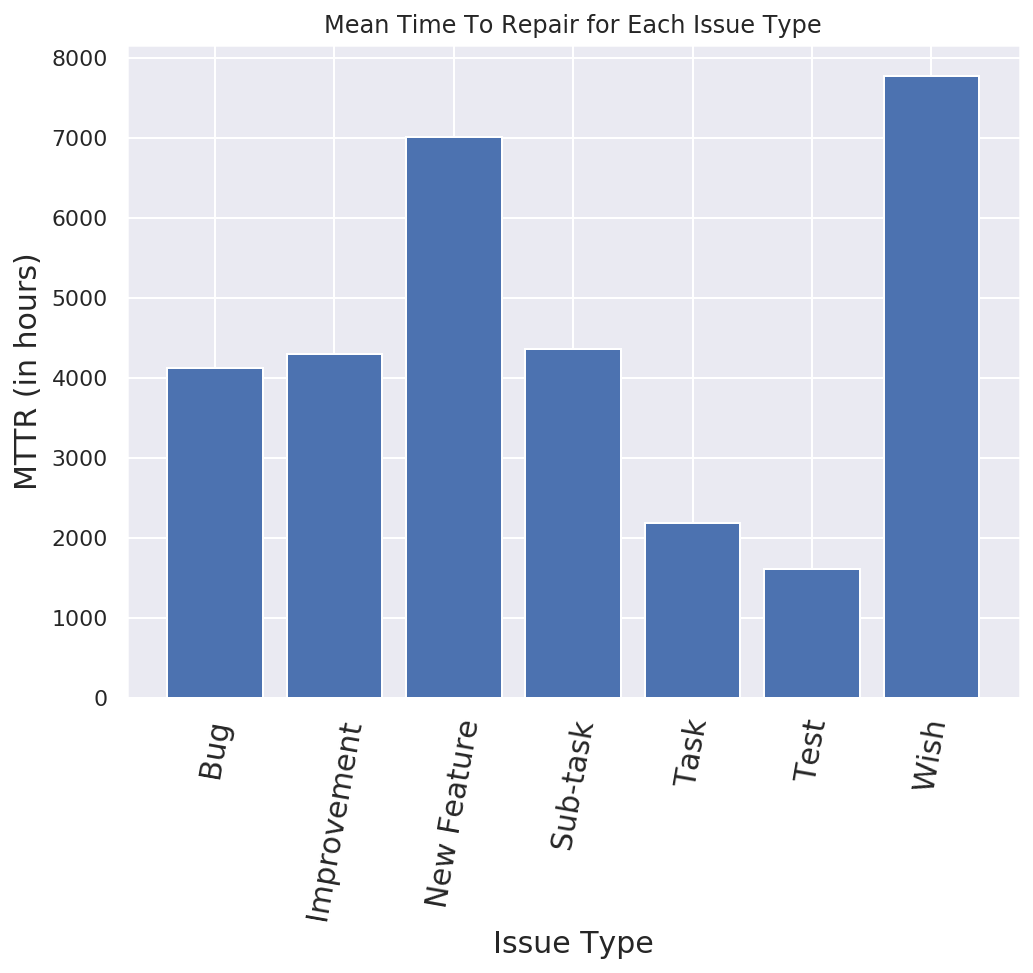

In [0]:

   # this is for plotting mean time to repair
    plt.figure(figsize=(8,6))
    index = np.arange(len(final_c))
    plt.bar(index,final_mttr)
    plt.xlabel('Issue Type', fontsize=15)
    plt.ylabel('MTTR (in hours)', fontsize=15)
    plt.xticks(index, final_c, fontsize=15, rotation=80)
    plt.title('Mean Time To Repair for Each Issue Type')
    plt.show()

In [0]:
type(dataset)

pandas.core.frame.DataFrame

In [0]:
from google.colab import files

dataset.to_csv('final1.csv')
#files.download('final1.csv')

In [0]:
dataset.head(10)

,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,0
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,4
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,4
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,0
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,0
5,5,LUCENE-8549,13194884,tessellator should throw an error if all point...,Closed,currently the tessellation in some situations ...,Blocker,Fixed,ivera,29/Oct/18 15:58,14/Mar/19 13:08,29/Sep/19 11:28,02/Nov/18 06:53,0
6,6,LUCENE-8592,13202609,multisortersort incorrectly sort integerlongmi...,Closed,multisortergetcomparableproviders on an intege...,Blocker,Fixed,NaN,05/Dec/18 18:20,14/Mar/19 13:08,29/Sep/19 11:28,07/Dec/18 18:34,0
7,7,LUCENE-8559,13196202,tessellator isintersectingpolygon method skip ...,Closed,the following condition seems wrong\r\ncodejav...,Blocker,Fixed,ivera,05/Nov/18 09:32,14/Mar/19 13:07,29/Sep/19 11:28,07/Nov/18 06:48,0
8,8,LUCENE-8550,13195145,tessellator fails when filtering coplanar poin...,Closed,currently when creating the linked list on the...,Blocker,Fixed,ivera,30/Oct/18 15:51,14/Mar/19 13:07,29/Sep/19 11:28,02/Nov/18 07:08,0
9,9,LUCENE-8534,13192200,another case of polygon tessellator going into...,Closed,related to lucene another case where tesselato...,Blocker,Fixed,ivera,17/Oct/18 11:27,14/Mar/19 13:07,29/Sep/19 11:28,02/Nov/18 06:43,0


In [0]:
print("The data-set has %d rows and %d columns"%(dataset.shape[0],dataset.shape[1]))

The data-set has 7191 rows and 14 columns


# Finding out which columns has the missing values not needed although since we would be working with either summary or description and usme koi missing values nhi hai

In [0]:
from __future__ import print_function
print (dataset.columns)
for col_name in dataset.columns:
    print (col_name,end=": ")
    print (sum(dataset[col_name].isnull()))

Index(['index', 'Issue key', 'Issue id', 'Summary', 'Status', 'Description',
       'Priority', 'Resolution', 'Assignee', 'Created', 'Updated',
       'Last Viewed', 'Resolved', 'Issue Type'],
      dtype='object')
index: 0
Issue key: 0
Issue id: 0
Summary: 0
Status: 0
Description: 0
Priority: 0
Resolution: 0
Assignee: 2411
Created: 0
Updated: 0
Last Viewed: 0
Resolved: 0
Issue Type: 0


# To see which rows are duplicated

In [0]:
sum(dataset.duplicated()) # which is indeed very good as the result is 0.

0

# finding out class distribution

In [0]:
category_counter={x:0 for x in set(dataset['Issue Type'])}

In [0]:
for each_cat in dataset['Issue Type']:
    category_counter[each_cat]+=1

In [0]:
print(category_counter)

{0: 3172, 1: 2751, 2: 425, 3: 93, 4: 530, 5: 146, 6: 74}


#Combining the Columns of summary and description and then applying NLP

In [0]:
dataset['Description']

0       here is an example failure\r\n\r\nnoformat\r\n...
1       the changes in lucene have breaking changes in...
2       at least for lucene this is not a security iss...
3       please pardon me if the project or component a...
4       this is a huge wtf just for limittokenoffsetfi...
                              ...                        
7186    reported by johan stuyts   html  \n\nfrequency...
7187    solrs prefixfilter class is not specific to so...
7188    just fixed some spelling in the mailinglistxml...
7189    resultsjsp in lucenewebwar demo throws jaspere...
7190    see title and i prefer my name to be removed f...
Name: Description, Length: 7191, dtype: object

In [0]:
dataset['Summary']

0                   testramusageestimatortestmap failures
1       provide backward compatibility for loading ana...
2        change all download urls in build files to https
3       commongramsqueryfilter in the query analyzer c...
4                  highlighter depends on analyzerscommon
                              ...                        
7186    index file format  example for frequency file ...
7187    promote solrs prefixfilter into java lucenes core
7188                        fixed spelling mailinglistxml
7189    resultsjsp in lucenewebwar uses unknown parsem...
7190      remove superfluous comment in mmapdirectoryjava
Name: Summary, Length: 7191, dtype: object

In [0]:
dataset["Merger"] = dataset["Summary"].str.cat(dataset["Description"], sep =" \n ") 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
dataset['Merger']

0       testramusageestimatortestmap failures \n here ...
1       provide backward compatibility for loading ana...
2       change all download urls in build files to htt...
3       commongramsqueryfilter in the query analyzer c...
4       highlighter depends on analyzerscommon \n this...
                              ...                        
7186    index file format  example for frequency file ...
7187    promote solrs prefixfilter into java lucenes c...
7188    fixed spelling mailinglistxml \n just fixed so...
7189    resultsjsp in lucenewebwar uses unknown parsem...
7190    remove superfluous comment in mmapdirectoryjav...
Name: Merger, Length: 7191, dtype: object

In [0]:
dataset

,index,Issue key,Issue id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last Viewed,Resolved,Issue Type,Merger
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,Bug,testramusageestimatortestmap failures \n here ...
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,Task,provide backward compatibility for loading ana...
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,Task,change all download urls in build files to htt...
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,Bug,commongramsqueryfilter in the query analyzer c...
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,Bug,highlighter depends on analyzerscommon \n this...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,341,LUCENE-706,12354647,index file format example for frequency file ...,Resolved,reported by johan stuyts html \n\nfrequency...,Trivial,Fixed,gsingers,03/Nov/06 05:40,06/Nov/06 02:21,30/Sep/19 08:38,06/Nov/06 02:21,Improvement,index file format example for frequency file ...
7187,343,LUCENE-676,12350979,promote solrs prefixfilter into java lucenes core,Closed,solrs prefixfilter class is not specific to so...,Trivial,Fixed,yseeley@gmail.com,25/Sep/06 19:25,05/Oct/06 21:10,30/Sep/19 08:38,05/Oct/06 21:10,Improvement,promote solrs prefixfilter into java lucenes c...
7188,344,LUCENE-649,12347796,fixed spelling mailinglistxml,Closed,just fixed some spelling in the mailinglistxml...,Trivial,Fixed,NaN,11/Aug/06 15:20,16/Aug/06 18:32,30/Sep/19 08:38,16/Aug/06 18:32,Improvement,fixed spelling mailinglistxml \n just fixed so...
7189,345,LUCENE-630,12346265,resultsjsp in lucenewebwar uses unknown parsem...,Closed,resultsjsp in lucenewebwar demo throws jaspere...,Trivial,Fixed,NaN,19/Jul/06 15:55,19/Jul/06 18:28,30/Sep/19 08:38,19/Jul/06 18:28,Bug,resultsjsp in lucenewebwar uses unknown parsem...


In [0]:
corpus=dataset.Merger
#corpus means collection of text. For this particular data-set, I will treat the newly created column merger
#as my corpus and will use that to create features.
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to conver the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [0]:
print("Number of TFIDF Features: %d"%len(tfidf_names)) #same info can be gathered by using tfidf_matrix.shape

Number of TFIDF Features: 42638


In [0]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

#**Learning Classifiers, Making Predictions and Validating Results**

##**Set the GPU to on before training for lesser training time.**

In [0]:
dataset.columns=["index","Issue_key","Issue_id","Summary","Status","Description","Priority","Resolution","Assignee","Created","Updated","Last_Viewed","Resolved","Issue_Type","Merger"]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

In [0]:
dataset

,index,Issue_key,Issue_id,Summary,Status,Description,Priority,Resolution,Assignee,Created,Updated,Last_Viewed,Resolved,Issue_Type,Merger
0,0,LUCENE-8898,13242651,testramusageestimatortestmap failures,Closed,here is an example failure\r\n\r\nnoformat\r\n...,Blocker,Fixed,ab,02/Jul/19 05:56,26/Jul/19 08:54,29/Sep/19 11:25,04/Jul/19 12:05,Bug,testramusageestimatortestmap failures \n here ...
1,1,LUCENE-8907,13244057,provide backward compatibility for loading ana...,Closed,the changes in lucene have breaking changes in...,Blocker,Fixed,tomoko,10/Jul/19 09:32,26/Jul/19 08:54,29/Sep/19 11:28,11/Jul/19 14:56,Task,provide backward compatibility for loading ana...
2,2,LUCENE-8807,13234613,change all download urls in build files to https,Closed,at least for lucene this is not a security iss...,Blocker,Fixed,uschindler,21/May/19 13:42,05/Jun/19 21:30,29/Sep/19 11:28,21/May/19 15:51,Task,change all download urls in build files to htt...
3,3,LUCENE-7698,13043903,commongramsqueryfilter in the query analyzer c...,Resolved,please pardon me if the project or component a...,Blocker,Fixed,NaN,17/Feb/17 08:47,03/Apr/19 08:21,29/Sep/19 11:28,22/Feb/17 10:55,Bug,commongramsqueryfilter in the query analyzer c...
4,4,LUCENE-6572,12838134,highlighter depends on analyzerscommon,Closed,this is a huge wtf just for limittokenoffsetfi...,Blocker,Fixed,simonw,16/Jun/15 11:26,14/Mar/19 13:08,29/Sep/19 11:28,17/Oct/18 17:04,Bug,highlighter depends on analyzerscommon \n this...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,341,LUCENE-706,12354647,index file format example for frequency file ...,Resolved,reported by johan stuyts html \n\nfrequency...,Trivial,Fixed,gsingers,03/Nov/06 05:40,06/Nov/06 02:21,30/Sep/19 08:38,06/Nov/06 02:21,Improvement,index file format example for frequency file ...
7187,343,LUCENE-676,12350979,promote solrs prefixfilter into java lucenes core,Closed,solrs prefixfilter class is not specific to so...,Trivial,Fixed,yseeley@gmail.com,25/Sep/06 19:25,05/Oct/06 21:10,30/Sep/19 08:38,05/Oct/06 21:10,Improvement,promote solrs prefixfilter into java lucenes c...
7188,344,LUCENE-649,12347796,fixed spelling mailinglistxml,Closed,just fixed some spelling in the mailinglistxml...,Trivial,Fixed,NaN,11/Aug/06 15:20,16/Aug/06 18:32,30/Sep/19 08:38,16/Aug/06 18:32,Improvement,fixed spelling mailinglistxml \n just fixed so...
7189,345,LUCENE-630,12346265,resultsjsp in lucenewebwar uses unknown parsem...,Closed,resultsjsp in lucenewebwar demo throws jaspere...,Trivial,Fixed,NaN,19/Jul/06 15:55,19/Jul/06 18:28,30/Sep/19 08:38,19/Jul/06 18:28,Bug,resultsjsp in lucenewebwar uses unknown parsem...


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
variables = tfidf_matrix
labels = dataset.Issue_Type
variables_train, variables_test, labels_train, labels_test = train_test_split(variables, labels, test_size=.3)

In [0]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (5033, 42638)
Shape of Test Data: (2158, 42638)


#**Applying Naive Bayes**

two types:-
*   Bernoulli
*   Multinomial



In [0]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

#**Bernoulli**

In [0]:
from time import time
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library:
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [0]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [0]:
prediction_time_container['b_naive_bayes']

0.9328866004943848

In [0]:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [0]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.595459
Training Time: 2.866400
Prediction Time: 0.932887


In [0]:
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[564, 393,   5,   0,   2,   6,   0],
       [ 57, 721,   2,   0,   1,   0,   0],
       [  5, 132,   0,   0,   0,   0,   0],
       [  3,  27,   0,   0,   0,   0,   0],
       [ 29, 143,   1,   0,   0,   0,   0],
       [ 13,  30,   0,   0,   0,   0,   0],
       [  5,  19,   0,   0,   0,   0,   0]])

In [0]:
print("Classification Metrics: ")
print(sklearn.metrics.classification_report(labels_test,bnb_predictions))
#accuracy score can be misleading when there is class imbalance problem in the data-set. 
# F1-Score is a better measure of a classifier performance. The greater the F1-Score, the better. Also, we can see
#that F1-Score and Accuracy score are somewhat similar because the data-set has negligible class imbalance issue:

Classification Metrics: 
              precision    recall  f1-score   support

         Bug       0.83      0.58      0.69       970
 Improvement       0.49      0.92      0.64       781
 New Feature       0.00      0.00      0.00       137
    Sub-task       0.00      0.00      0.00        30
        Task       0.00      0.00      0.00       173
        Test       0.00      0.00      0.00        43
        Wish       0.00      0.00      0.00        24

    accuracy                           0.60      2158
   macro avg       0.19      0.21      0.19      2158
weighted avg       0.55      0.60      0.54      2158



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#**Multinomial Naive Bayes**
Bernoulli Naive Bayes just uses the fact that whether a feature is present or not. However if we somehow also take into account the occurrence weight or count of the feature as well (in our case, the TFIDF weight of each feature), we can hypothesize that the performance of such classifier will be equally good, if not better. 

In [0]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [0]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
#and its training and prediction time are:
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.639944
Training Time: 1.238803s
Prediction Time: 0.321460s


#**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

Training Time: 34.568101s
Prediction Time: 0.413711s
Accuracy Score of Random Forests Classifier: 
0.6538461538461539
[[804 166   0   0   0   0   0]
 [187 592   0   0   2   0   0]
 [ 24 110   3   0   0   0   0]
 [  5  24   0   1   0   0   0]
 [ 64 101   0   0   8   0   0]
 [ 24  18   0   0   0   1   0]
 [  3  19   0   0   0   0   2]]


#**Linear SVM using Stochastic Gradient Descent**
Stochastic Gradient Descent (SGD) is a one of the most efficient approaches used in linear classifiers under convex loss functions such as (linear) Support Vector Machines. It has proven to perform well in in large-scale and sparse machine learning problems.

In [0]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

Training Time: 61.922546s
Prediction Time: 0.306915s
Accuracy Score of Linear SVM Classifier: 0.646432
[[755 196   0   0  16   3   0]
 [167 588  10   1  13   2   0]
 [ 23  94  17   1   2   0   0]
 [  7  21   0   1   1   0   0]
 [ 56  84   2   0  28   3   0]
 [ 17  18   0   0   2   6   0]
 [  4  18   0   0   2   0   0]]


In [0]:
#if we train the SGD Classifier with elastic net penalty, it  brings more sparsity to the model not possible with the L2:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)
svm_enet_predictions=svm_classifier_enet.predict(variables_test)
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 0.649676


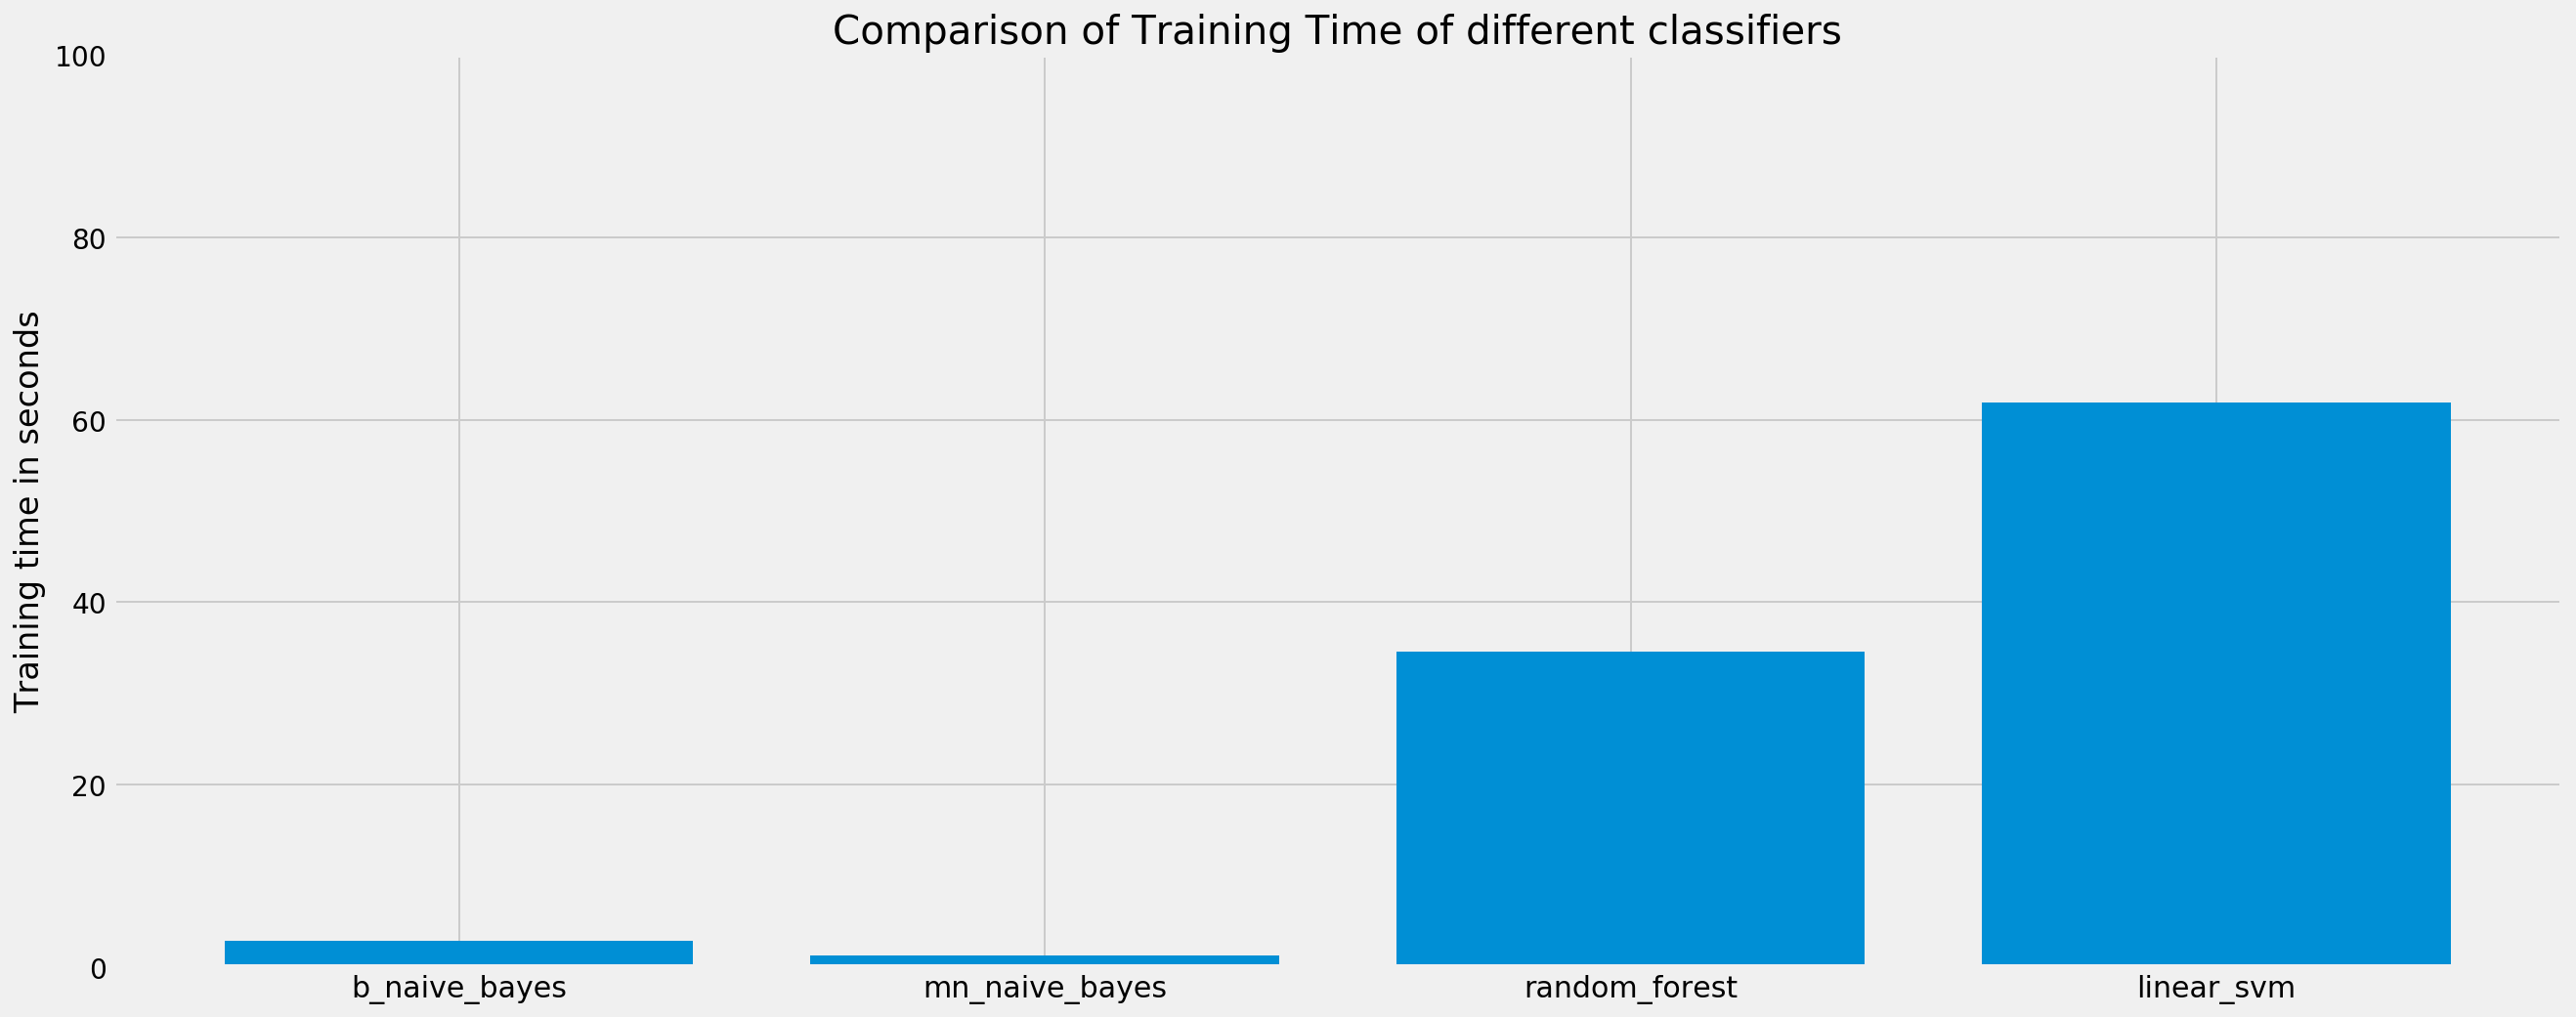

In [0]:
import matplotlib.pyplot as plt
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),training_time_container.values(),align='center')
    plt.xticks(range(4),training_time_container.keys(),fontsize = 15)
    plt.ylabel("Training time in seconds")
    plt.ylim(0,100)
    plt.grid(True)
    plt.title("Comparison of Training Time of different classifiers")

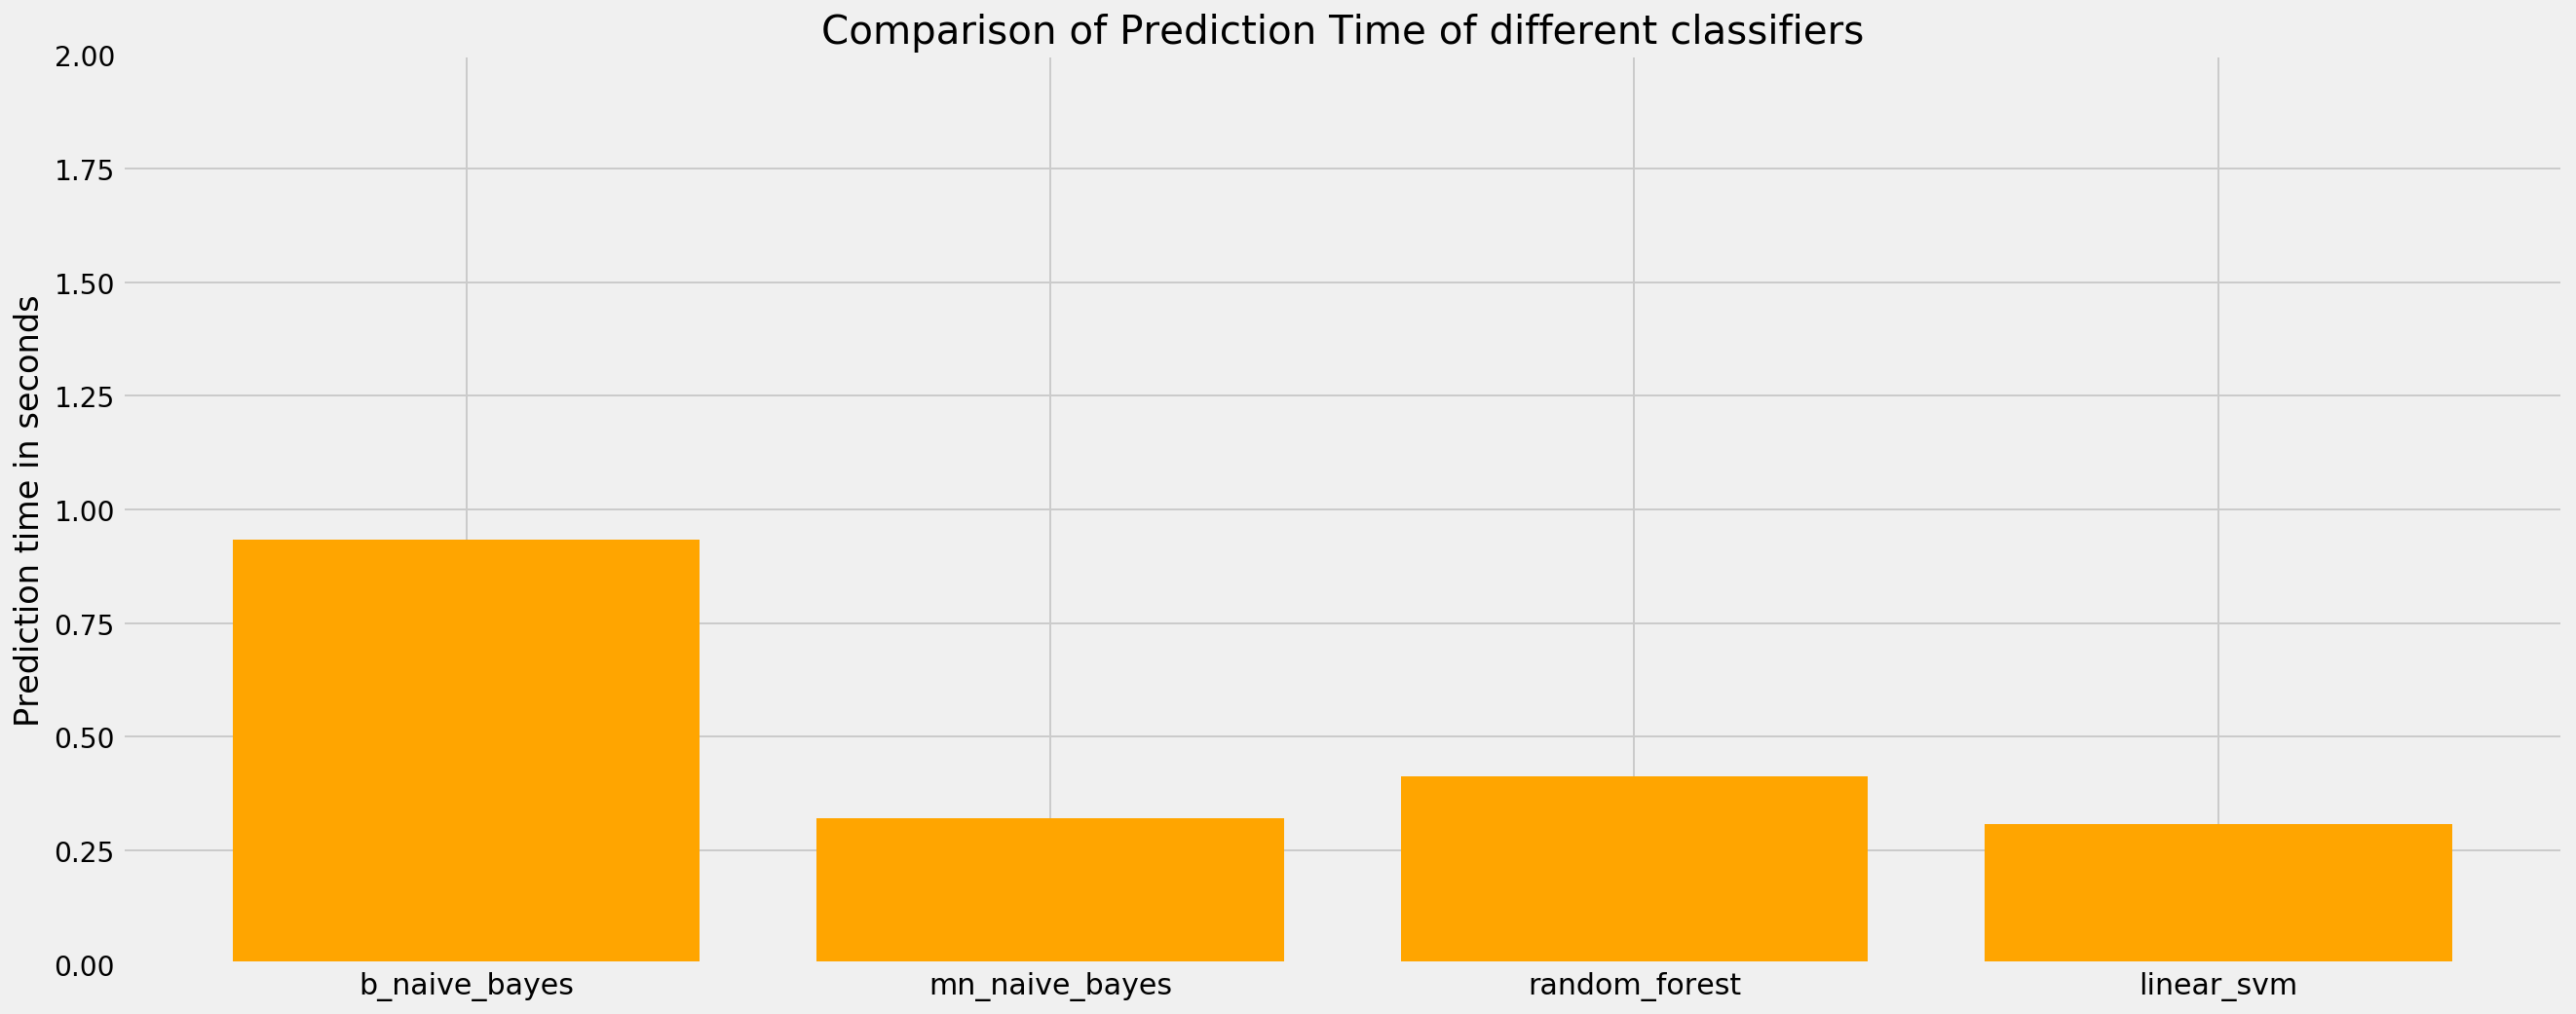

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),prediction_time_container.values(),align='center',color='orange')
    plt.xticks(range(4),prediction_time_container.keys(),fontsize = 15)
    plt.ylabel("Prediction time in seconds")
    plt.grid(True)
    plt.ylim(0,2)
    plt.title("Comparison of Prediction Time of different classifiers")

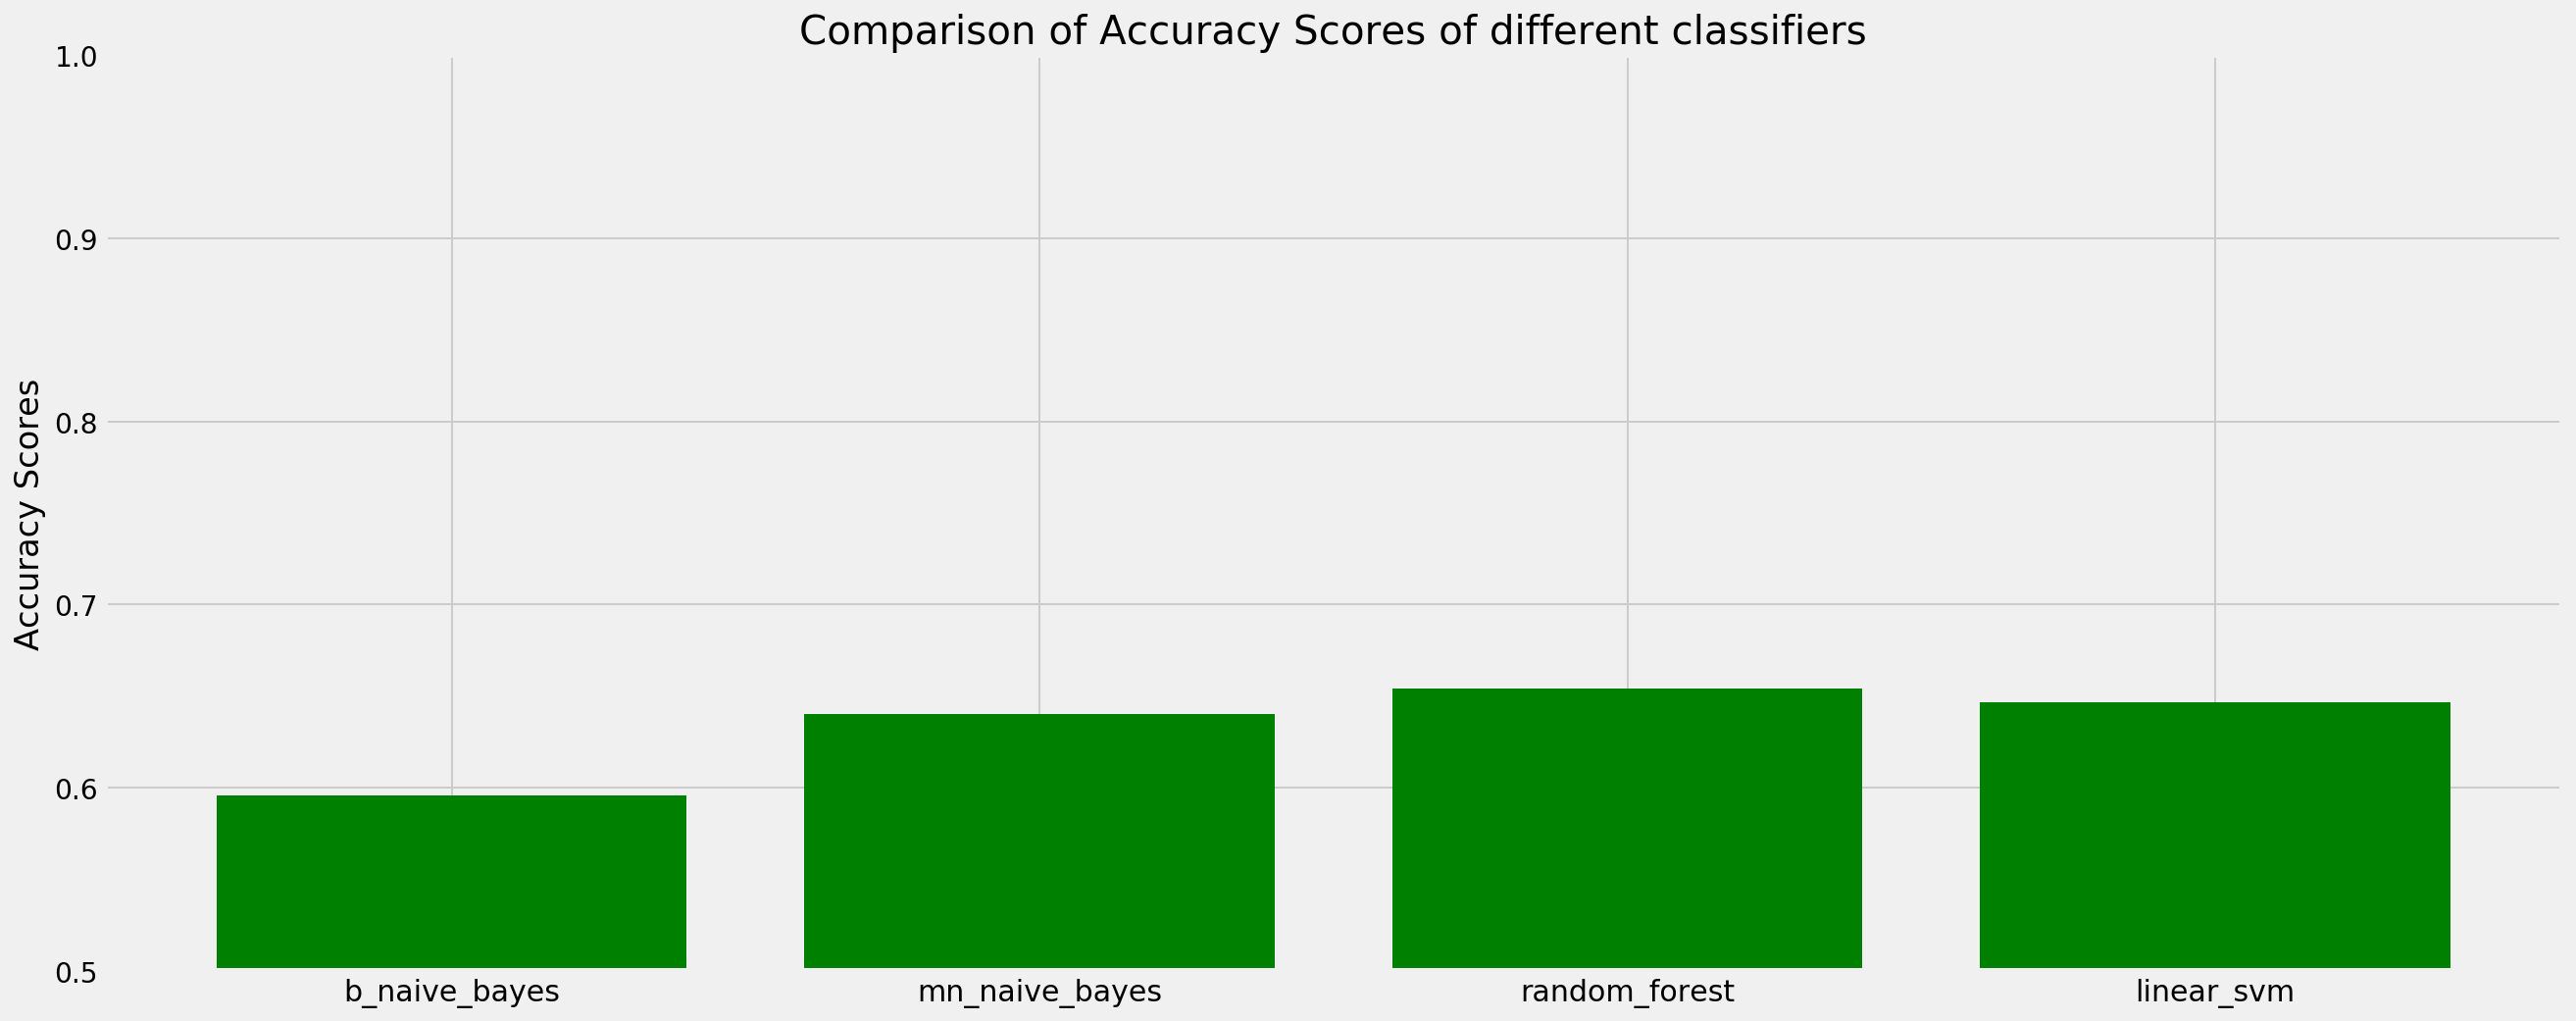

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(range(4),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(4),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.5,1.0)

#**So far we are using the unbalanced dataset, thats why we get such less accuracy upon every classifier.**
#**Suggestions to improve the accuracy and improving the readability are welcomed**


#**Ensemble Learning**

##Voting Classifier

training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

#Variables used earlier for classifiers.

bnb_classifier=BernoulliNB()

mn_bayes=MultinomialNB()

rf_classifier=RandomForestClassifier(n_estimators=50)

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

nl_svm_classifier=SVC(C=1000000.0, gamma='auto_deprecated', kernel='rbf')

variables_train, variables_test, labels_train, labels_test  =   train_test_split(variables, labels, test_size=.3)



#**Hard Voting / Majority Voting**

In [0]:
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('Bernoulli',bnb_classifier))
estimators.append(('Multinomial',mn_bayes))
estimators.append(('RandomForest',rf_classifier))
estimators.append(('SVMLinear',svm_classifier))
#estimators.append(('SVMNonLinear',nl_svm_classifier))
ensemble = VotingClassifier(estimators,voting = 'hard')

In [0]:
#fit model to training data
t0=time()
ensemble.fit(variables_train, labels_train)

ensemble_training_time=time()-t0
training_time_container['Hard'] = ensemble_training_time
print("Training Time: %fs"%ensemble_training_time)
#test our model on the test data
ensemble.score(variables_test, labels_test)

Training Time: 108.784069s


0.6510658016682113

In [0]:
t0=time()
ensemble_predictions=ensemble.predict(variables_test)
ensemble_prediction_time = time() - t0
prediction_time_container['Hard'] = ensemble_prediction_time
print("Prediction Time: %fs"%ensemble_prediction_time)

accuracy_container['Ensemble_hard']=sklearn.metrics.accuracy_score(labels_test, ensemble_predictions)
print("Accuracy Score of Hard-Voting Ensemble is : %f" %accuracy_container['Ensemble_hard'])

print(sklearn.metrics.confusion_matrix(labels_test,ensemble_predictions))

Prediction Time: 1.974143s
Accuracy Score of Hard-Voting Ensemble is : 0.651066
[[788 182   0   0   0   0   0]
 [166 615   0   0   0   0   0]
 [ 20 116   1   0   0   0   0]
 [  5  25   0   0   0   0   0]
 [ 57 115   0   0   1   0   0]
 [ 18  25   0   0   0   0   0]
 [  5  19   0   0   0   0   0]]


##If ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

So what we need is calibrated classifiers Svm me loss= hinge rahega to classifier is non calibrated first calibrate it.


SGDClassifier(loss = 'hinge') does not have probability by default.

You have to pass SGDclassifier(loss = 'hinge') to CalibratedClassifierCV() which will calculate the probability values of SGDclassifier(loss = 'hinge')

In [0]:
svm_classifier=svm_classifier.fit(variables_train, labels_train)
from sklearn.calibration import CalibratedClassifierCV
svm_calibrator = CalibratedClassifierCV(svm_classifier, cv='prefit')
svm_calibrator = svm_calibrator.fit(variables_train, labels_train)

In [0]:
estimators1 = []
estimators1.append(('Bernoulli',bnb_classifier))
estimators1.append(('Multinomial',mn_bayes))
estimators1.append(('RandomForest',rf_classifier))
ensemble2 = VotingClassifier(estimators1,voting = 'soft')
#fit model to training data
t0=time()
ensemble2.fit(variables_train, labels_train)

ensemble2_training_time=time()-t0
print("Training Time: %fs"%ensemble2_training_time)
#test our model on the test data
print("Accuracy: %fs"%ensemble2.score(variables_test, labels_test))
t0=time()
ensemble2_predictions=ensemble2.predict(variables_test)
ensemble2_prediction_time = time() - t0
training_time_container['soft'] = ensemble2_training_time
prediction_time_container['soft'] = ensemble2_prediction_time
print("Prediction Time: %fs"%ensemble2_prediction_time)

accuracy_container['Ensemble_soft']=sklearn.metrics.accuracy_score(labels_test, ensemble2_predictions)
print("Accuracy Score of Soft-Voting Ensemble is : %f" %accuracy_container['Ensemble_soft'])

print(sklearn.metrics.confusion_matrix(labels_test,ensemble2_predictions))

Training Time: 37.337785s
Accuracy: 0.618165s
Prediction Time: 1.626355s
Accuracy Score of Soft-Voting Ensemble is : 0.618165
[[626 342   1   0   0   1   0]
 [ 73 708   0   0   0   0   0]
 [  6 131   0   0   0   0   0]
 [  3  27   0   0   0   0   0]
 [ 34 139   0   0   0   0   0]
 [ 14  29   0   0   0   0   0]
 [  5  19   0   0   0   0   0]]


#**Bagged Decision Trees**
## BaggingClassifier with the Classification and Regression Trees algorithm (DecisionTreeClassifier). A total of 100 trees are created.

In [0]:
from time import time 
import random
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
num_trees = 100       #tweaking this value for accuracy increase, but keep an eye for overfitting.
Bagging_classifier= BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=random.seed())
t0=time()
Bagging_classifier.fit(variables_train, labels_train)

BaggingClassifier_training_time=time()-t0
print("Training Time: %fs"%BaggingClassifier_training_time)
training_time_container['bagging'] = BaggingClassifier_training_time

#test our model on the test data
print("Accuracy: %fs"%Bagging_classifier.score(variables_test, labels_test))


Training Time: 801.844698s
Accuracy: 0.630213s


In [0]:
t0=time()
BaggingClassifier_predictions=Bagging_classifier.predict(variables_test)
BaggingClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%BaggingClassifier_prediction_time)
prediction_time_container['bagging'] = BaggingClassifier_prediction_time

accuracy_container['Bagging_classifier']=sklearn.metrics.accuracy_score(labels_test, BaggingClassifier_predictions)
print("Accuracy Score of Bagging classifier is : %f" %accuracy_container['Bagging_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,BaggingClassifier_predictions))

Prediction Time: 62.412899s
Accuracy Score of Bagging classifier is : 0.630213
[[745 218   2   0   2   3   0]
 [178 589   5   0   8   0   1]
 [ 20 111   6   0   0   0   0]
 [  7  23   0   0   0   0   0]
 [ 64  92   3   0  14   0   0]
 [ 22  15   0   0   1   5   0]
 [  5  17   0   0   1   0   1]]


#**Boosting Algorithm**
##**Adaboost**

It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [0]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 100
Adaboost_classifier = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
Adaboost_classifier.fit(variables_train, labels_train)

AdaboostClassifier_training_time=time()-t0
print("Training Time: %fs"%AdaboostClassifier_training_time)

#test our model on the test data
print("Accuracy: %fs"%Adaboost_classifier.score(variables_test, labels_test))
t0=time()
AdaboostClassifier_predictions = Adaboost_classifier.predict(variables_test)
AdaboostClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%AdaboostClassifier_prediction_time)
training_time_container['adaboost'] = AdaboostClassifier_training_time
prediction_time_container['adaboost'] = AdaboostClassifier_prediction_time

accuracy_container['Adaboost_classifier']=sklearn.metrics.accuracy_score(labels_test, AdaboostClassifier_predictions)
print("Accuracy Score of Adaboost classifier is : %f" %accuracy_container['Adaboost_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,AdaboostClassifier_predictions))

Training Time: 480.884119s
Accuracy: 0.431881s
Prediction Time: 24.156702s
Accuracy Score of Adaboost classifier is : 0.431881
[[263 641   0   0   0  64   2]
 [113 655   0   0   0  12   1]
 [ 17 116   0   0   0   2   2]
 [  4  23   0   0   0   2   1]
 [ 26 139   0   0   0   5   3]
 [ 21   9   0   0   0  13   0]
 [  3  20   0   0   0   0   1]]


##**Stochastic Gradient Boosting**


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
SGB_classifier = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
t0=time()
SGB_classifier.fit(variables_train, labels_train)

SGBClassifier_training_time=time()-t0
print("Training Time: %fs"%SGBClassifier_training_time)

#test our model on the test data
print("Accuracy: %fs"%SGB_classifier.score(variables_test, labels_test))
t0=time()
SGBClassifier_predictions = SGB_classifier.predict(variables_test)
SGBClassifier_prediction_time = time() - t0
print("Prediction Time: %fs"%SGBClassifier_prediction_time)
training_time_container['sgb'] = SGBClassifier_training_time
prediction_time_container['sgb'] = SGBClassifier_prediction_time

accuracy_container['SGB_classifier']=sklearn.metrics.accuracy_score(labels_test, SGBClassifier_predictions)
print("Accuracy Score of SGB_classifier is : %f" %accuracy_container['SGB_classifier'])

print(sklearn.metrics.confusion_matrix(labels_test,SGBClassifier_predictions))

NameError: ignored

## so what we get is useless accuracy beacuse the dataset is actually highly unbalanced and would not show any good result.
Two things for future work, Cross validation or correcting our dataset ie doing a class balance for the dataset.

not much hope attached to cross validation. Class balance by creating copy class wise seems to be the only option for now.

moreover what's astounding is that the individual classifiers are performing way better than ensemble, although the reverse should have happened.

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),accuracy_container.values(),align='center',color='g')
    plt.xticks(range(9),accuracy_container.keys(),fontsize = 15)
    plt.ylabel("Accuracy Scores")
    plt.grid(True)
    plt.title("Comparison of Accuracy Scores of different classifiers")
    plt.ylim(0.3,1.0)

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),training_time_container.values(),align='center',color='g')
    plt.xticks(range(9),training_time_container.keys(),fontsize = 15)
    plt.ylabel("training time")
    plt.grid(True)
    plt.title("Comparison of training time of different classifiers")
    plt.ylim(0.3,1.0)

In [0]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(25,8))
    plt.bar(range(9),prediction_time_container.values(),align='center',color='g')
    plt.xticks(range(9),prediction_time_container.keys(),fontsize = 15)
    plt.ylabel("prediction time")
    plt.grid(True)
    plt.title("Comparison of prediction time of different classifiers")
    plt.ylim(0.3,1.0)